# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


In [3]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [4]:
# Display a description of the dataset
display(data.describe(np.linspace(0.9,1,11)))

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
90%,27090.500000,12229.900000,18910.100000,7545.300000,7438.300000,2945.900000
91%,28075.440000,12785.350000,19831.190000,8007.560000,7849.850000,3108.920000
92%,29725.880000,13250.560000,20386.160000,8305.880000,8672.640000,3181.880000
93%,31083.280000,14705.800000,21541.530000,8692.270000,9048.920000,3491.940000
94%,32409.300000,15727.980000,22241.400000,9475.320000,9917.180000,3942.580000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [5]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [95,181,0]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,3,2920,6252,440,223,709
1,112151,29627,18148,16745,4948,8550
2,12669,9656,7561,214,2674,1338


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**
**For cust 0**:
* Fresh, Frozen, and detergent paper products are very low that it was below Q1, even the fresh products purchase was the minimum of all Fresh products purchases
* Delicat. and milk purchases values are above Q1 
* Only the grocery that is below Q3 
* From these data, I think it must be a very small market that sells grocery.  

**For cust 1**:
* All it's purchases are above Q3, even it's purchases of fresh is the maximum 
* I think it's something like a grand market that has hundreds of customers every day (to sell all these fresh products)  

**For cust 2**:
* only Frozen products are below the Q1 
* milk purchases are above Q3 
* All other products are below Q3 
* I think it's a cafe, where it uses a lot of milk, it serves some food but it's not a restaurant as it consumes a small number of frozen products 

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop(['Detergents_Paper'],axis =1)
target= data['Detergents_Paper']
# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(new_data,target, test_size=0.25, random_state = 0)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=0).fit(X_train,y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test,y_test)
score


0.72865518125414541

### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**
* Detergents_Paper feature
* The reported prediction score was 0.73
* I think so It has a high R2 score, So there's a correlation between the model and predicted feature 

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

C:\Python27\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


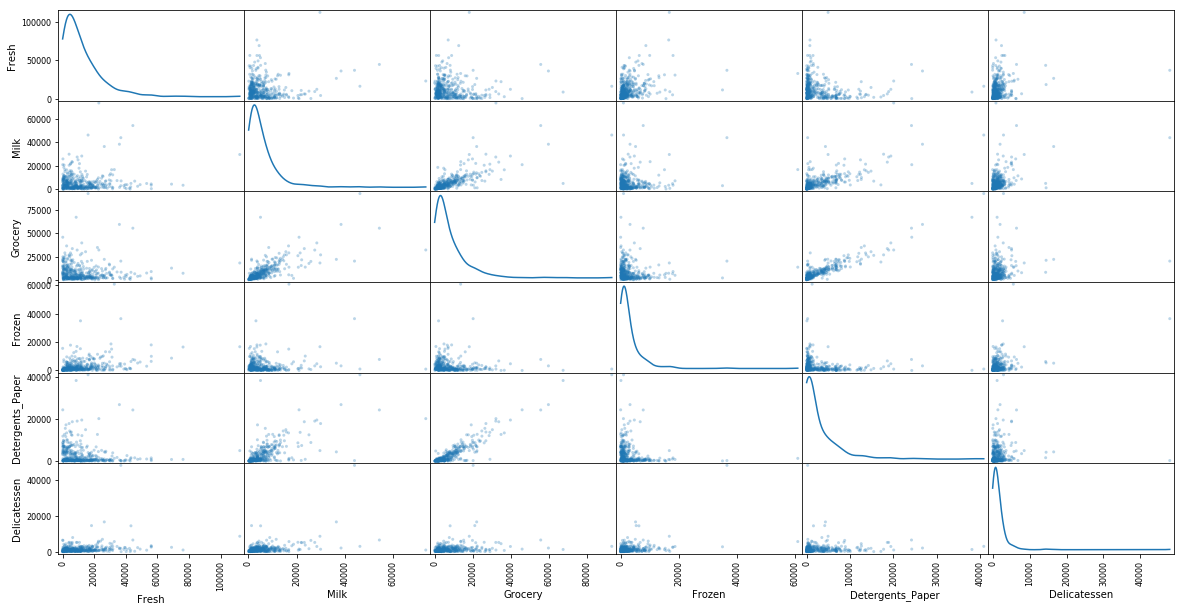

In [16]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (20,10), diagonal = 'kde');

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

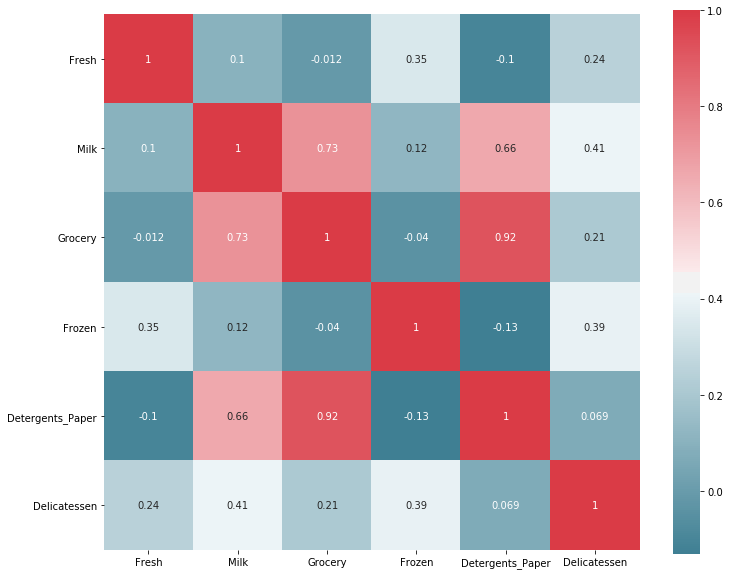

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

hmap=data.corr()
_,ax=plt.subplots(figsize=(12,10))
cmap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(hmap,cmap=cmap,ax=ax,square=True,annot=True)

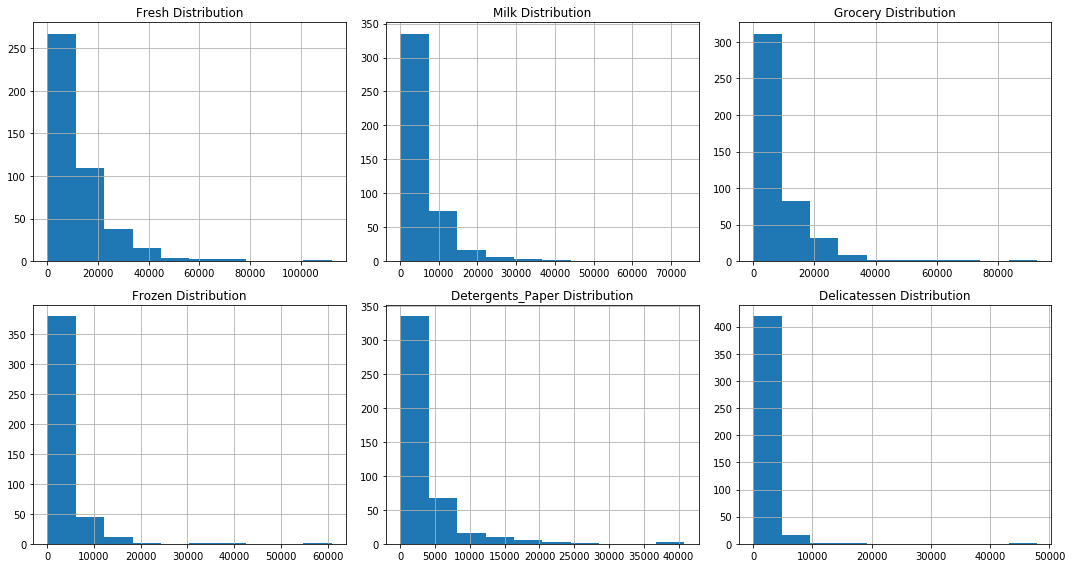

In [18]:
fig=plt.figure()
for i, var_name in enumerate(data.columns):
    ax=fig.add_subplot(2,3,i+1)
    data[var_name].hist(bins=10,ax=ax,figsize=(15,8))
    ax.set_title(var_name+" Distribution")
fig.tight_layout()  # Improves appearance a bit.
plt.show()


**Answer:**
* By looking at the histogram of every feature and their distribution with each other on the scatter grid, also by revising the statistics summary table we have made before, all the data are right-skewed since most of the values above the third quartile is very large and if we searched for outliers locating the values above $Q3+1.5*IQR$ and below $Q1-1.5*IQR$ without normalization we would find that  

|-|Fresh|Milk|Grocery|Frozen|Detergents_paper|Delicatessen|
|-|-|-|--|-----|---|---|
|Q1|3127|1533|2153|742|256|408|
|Q3|16933|7190|10655|3554|3922|1820|
|IQR|13806|5657|8502|2812|3666|1412|
|1.5*IQR|20709|8485.5|12753|4218|5499|2118|
|outliers|above 37642|above 15675.5|above 23408|above 7772|above 9421|above 3938|
|amount of data|about 5%|about 6%|about 5%|about 10%|about 7%|about 6%|  
* from the table above we can figure there are outliers in the right end of the distribution and that's why there are a lot of points around the zero, the scale of the distribution is very large so all points below the third quartile appear to be close to zero 
* It's clear from the scatter grid and clearer from the heatmap that there is a strong correlation between grocery and detergents_paper, and high correlation between Milk Vs. Grocery and Milk Vs. Detergents_paper
* It makes me suspicious as it seems that there aren't a strong correlation between it and any other product, I thought that a special product like Delicatessen is something that used in restaurants and cafes, but I was wrong
* Those features have a distribution that almost linear 

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

C:\Python27\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


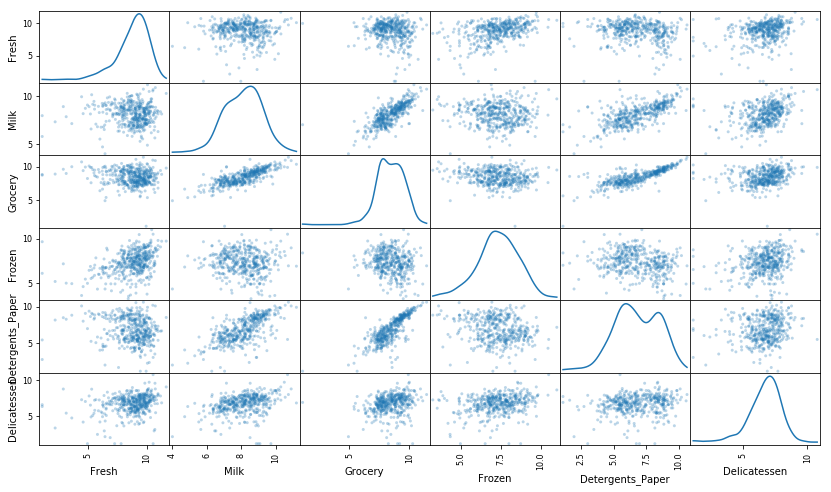

In [25]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');


### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [24]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
1,11.627601,10.296441,9.806316,9.725855,8.506739,9.053687
2,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [26]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    #display(step,Q1,Q3)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers = [65,266,128,75,154]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)


Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**After normalization**  

|-|Step|Q1|Q3|Lower edge|Higher edge|outliers|percentage|
|--|---|--|---|--|---|---|---|
|Fresh|2.533|8.05|9.74|5.52|12.27|16|3.6%|
|Milk|2.32|7.33|8.88|5.01|11.2|4|0.9%|
|Grocery|2.4|7.67|9.27|5.27|11.67|2|0.45%|
|Frozen|2.35|6.61|8.18|4.26|10.53|10|2.27%|
|Detergents_paper|4.09|5.55|8.27|1.46|12.36|2|0.45%|
|Delicatessen|2.24|6.01|7.51|3.77|9.75|14|3.18%|


**Answer:**
* There are some data points that considered outliers in more than one features which they were removed :  

|no.|category|
|----|---|
|65|Fresh & Frozen|
|66|Fresh & Delicatessen|
|75|Grocery & detergents_paper|
|128|Fresh & Delicatessen|
|154|Milk & Grocery & Delicatessen|

* every data point is a valuable piece of information even if it's outlier, here we can determine the customer bands, where the lower outliers could represent the least band of customers don't buy a lot in usual and to put that in consideration when dealing with them again, and the higher outliers represent the grand customers that buy a lot and also represent the highest customer band in purchasing 
* I was with the idea of eliminating the outliers in the features with a low percentage (less than 1%), as the percentage of outliers increases their effect will decrease(that what I thought)
* There was another idea that we should eliminate the non-redundant outliers(that aren't outliers in more than one features) 
* But when I recalled how K-means work and how it will be affected by outliers, where the K-means will move their centroids toward the outliers instead of the mean of the cluster, so I think that maybe the outliers that fall under more than one category will have a powerful effect on the centroids than the one-featured outlier
* So I removed the outliers trading the information they give with the accuracy 

**note**: can someone explain this point further because I'm not sure 100% of my answer

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [27]:
log_samples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 6 columns):
Fresh               3 non-null float64
Milk                3 non-null float64
Grocery             3 non-null float64
Frozen              3 non-null float64
Detergents_Paper    3 non-null float64
Delicatessen        3 non-null float64
dtypes: float64(6)
memory usage: 180.0 bytes


### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

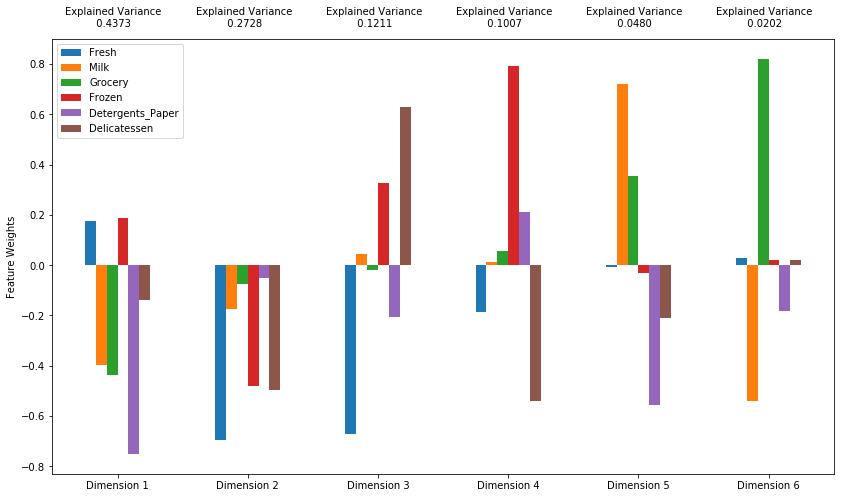

In [28]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_data)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

In [29]:
display(pca_results)

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4373,0.1772,-0.3983,-0.4366,0.1862,-0.7518,-0.1397
Dimension 2,0.2728,-0.6947,-0.1757,-0.0770,-0.4805,-0.0527,-0.4969
Dimension 3,0.1211,-0.6711,0.0425,-0.0185,0.3282,-0.2058,0.6304
Dimension 4,0.1007,-0.1864,0.0124,0.0561,0.7907,0.2131,-0.5397
Dimension 5,0.0480,-0.0066,0.7197,0.3547,-0.0316,-0.5575,-0.2106
Dimension 6,0.0202,0.0296,-0.5391,0.8211,0.0210,-0.1830,0.0212


**Answer:**
* by the first two principal components there is 0.7101 variance explained in total 
* for the first four principal components there is 0.9319 variance explained in total 
* **First dim.**: the first dimension explained about 44% which is nearly half of the variation in data,the first dimension is inversly correlated with Detergents_Paper, second in correlation power is grocery then Milk which also has negative weights so inversely correlated ,so these three features are correlated also, and when one of them decreases all of them tends to decrease.  
* **Second dim.**: the second dimension explained about 27% which is nearly quarter of the variation, so by using both dimensions we will have cum. explained variance of 71%, where Fresh products are negatively correlated with the variance represented by the second dimension, then Frozen and Delicatessen, and those are the three features effect the variation explained by the second dim., so when they increase the second dimension decreases  
* **Third dim.**:For the third one, it explained another 12% to be the explained variance so far 83%, there is  high negative correlation of Fresh products with this dimension, and  high positive correlation of Delicatessen with this dimension, also there is positive correlation of frozen and negative one of Detergents_paper, so it represents the four features with different proportion and how they affect this dimension
* **Forth dim.**: Finally this dim. adds another 10% to make the cumulative sum of explained variance equal 93%, there is a very high correlation of Frozen, and high negative correlation with Delicatessen, also a positive correlation of Detergents_paper, and a negative one of fresh


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [30]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-1.7604,-0.0754,-0.9681,-1.6782,0.2636,-0.3880
1,-1.7766,-0.8547,0.2485,0.0028,0.1200,-0.2083
2,-1.8553,-1.6369,1.3435,-0.5329,-0.3939,-0.3074
3,1.1767,-1.3852,0.5634,0.4312,-0.6880,0.6424
4,-0.7461,-2.4207,0.5113,-0.3160,-0.3239,0.0656
5,-1.0813,-0.3766,-0.2625,-0.8775,0.1845,-0.5332
6,-1.1378,0.2050,-1.3183,-0.5306,-0.4857,0.1085
7,-1.5533,-0.9403,0.3843,-0.2595,-0.4577,0.1547
8,-0.8769,0.6158,-0.5485,-0.8006,-0.1553,0.0337
9,-2.8634,-0.7409,0.1496,-0.1754,-0.0245,0.1247


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [31]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [32]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(log_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

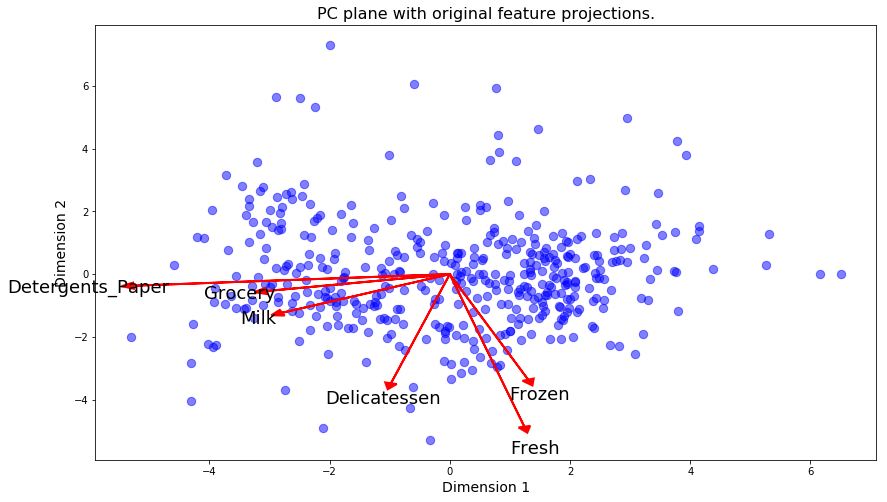

In [33]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**
**K-Means main Advantages** 
* It's very simple to implement and it uses relatively fewer computer resources 
* If the data is normally distributed, it will be very effective since the technique of K-means algorithm works best here

**GMM main Advantages**
* It's soft clustering technique that works on probability it gives for each point to belong to a certain cluster, and for those who are in the middle that we aren't sure about them will remain unclustered 
* It's more efficient in dealing with non-normal data 
* It has less sensitivity to outliers

**Observation**
* the data has outliers, there aren't single criteria to cluster the data every customer was interested in some products and with different ratios, so we need to figure out the probability of belonging of each data to each cluster 

**I will go with GMM** 

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [35]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
clusterer = GaussianMixture(n_components=2,random_state=0).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data,preds)


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**
**random_state of 0**  
0.419498932943 number of clusters is 2  
0.299649783025 number of clusters is 3  
0.326175272763 number of clusters is 4  
0.264592980821 number of clusters is 5  
0.307539334736 number of clusters is 6  
0.3335068059 number of clusters is 7  
0.3314659256 number of clusters is 8  
0.257957166318 number of clusters is 9  
  
**random_state of 1**  
0.419498932943 number of clusters is 2  
0.407239079648 number of clusters is 3  
0.296633680381 number of clusters is 4  
0.302078577041 number of clusters is 5  
0.290372137931 number of clusters is 6  
0.312967837138 number of clusters is 7  
0.323622138892 number of clusters is 8  
0.305100787162 number of clusters is 9  
  
**random_state of 2**  
0.419498932943 number of clusters is 2  
0.404207647731 number of clusters is 3  
0.268366007617 number of clusters is 4  
0.298377814088 number of clusters is 5  
0.30755522733 number of clusters is 6  
0.337041406946 number of clusters is 7  
0.328205028225 number of clusters is 8  
0.300977126895 number of clusters is 9  
  
**The best is when we used 2 clusters**

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

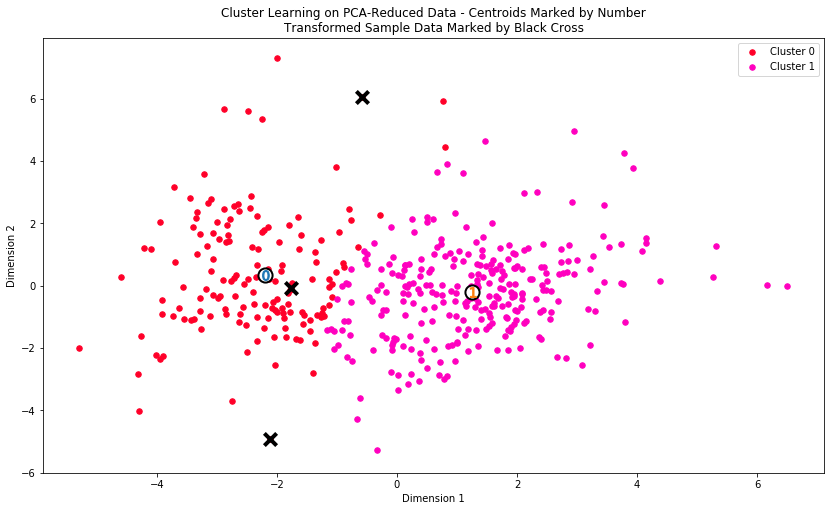

In [36]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [37]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,3398.0,7658.0,12029.0,850.0,4626.0,920.0
Segment 1,9041.0,2128.0,2780.0,2083.0,356.0,739.0


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**
for more insight we should put the "mean" row with segment 0 and 1 

|-|Fresh|Milk|Grocery|Frozen|Detergents_Paper|Delicatessen|
|--|---|--|---|---|----|---|
|**Segment 0**|3398|7658|12029|850|4626|920|
|**Segment 1**|9041|2128|2780|2083|356|739|
|**Mean**| 12000|5796|7951|3071|2881|1524|

* For fresh column, it's obvious that it has outliers since the mean is larger than both means, we could say that the segment 1 takes more Fresh products than S0
* For Milk column, S0 consumes more than that of S1
* For Grocery column, S0 buys more, and S0 takes grocery products fur more than S1
* For Frozen column, there are outliers here to make mean increase like this, also S1 buys more than S0 
* For Detergents_Paper S0 buys more than S1, and the gap between the two segments is too large 
* For Delicatessen, there's a lot of outliers, and S0 buys more than S1 but not too much 

**Conc**: we can say that 
S0: are supermarkets so they sell a lot of Grocery(far a lot), and detergents_Paper also Milk 
S1: could be cafes and restaurants or any place that serves Fresh and Frozen products and use delicatessen on the food 

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [207]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0


**Answer:**
point 0 is an outlier in Fresh products (bought 3) so I think this will dominate and make it from cluster 0 (we will name it supermarkets), also it bought a lot of grocery and milk 

point 1 is a bit weird, it bought a lot of things from all products, but the most purchases were Fresh products which distinguish the second cluster(called it restaurants), also the second most purchases were Frozen and delicatessen which also point to restaurants cluster _I don't know why maybe a mistake_  

point 2 also made moderate purchases from all products except for frozen, and the most purchases are Milk so it supposed to be supermarkets yes

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**
He can use the segments above to determine which of them need more frequent service, where restaurants cluster need more frequent service because there are fresh products and cant just stack them, while supermarkets don't need this frequent service so maybe the 3 days a week is enough   

To apply A/B test,we need two groups one is the control group that doesn't face any change and one is the variation group that will be applied changes to, for these two groups we can't just split the whole data into two because there are different customers and we don't know how they will be represented in the groups , so to solve this we need to split every segment(we have 2 only here) into two and every group take half from each segment (we could use random sampling or any other sampling technique it won't matter since we know that half of the data from one cluster and the other half from the second)  

we leave the control group with the service as usual 5 days a week , and the variation group 3 days a week and compare the two feedbacks from the two group   

and to see which cluster will be happy with the new service we could make 2 A/B tests each for every cluster , so every cluster for 2 groups and the test run as usual indpendently 

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**
By using the data and their labels (that's the output of our clustering) we can train a supervised model like logistic regression then and classify the new customers into one of our predefined clusters

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

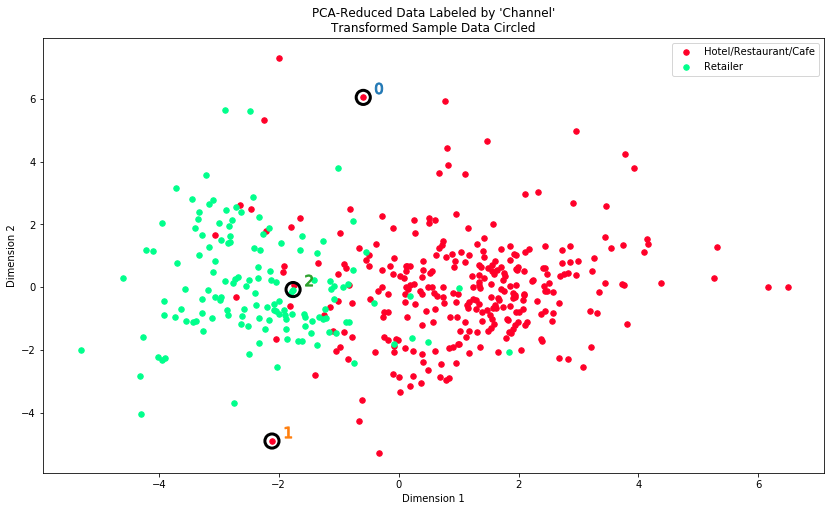

In [209]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**
* I think(as I don't know the score of this) my clustering was far better, there are a lot of mistakes or false positives 
* No, there is overlap between the two clusters 
* No, it's not the overlap demolish my definition for each customer segments, actually due to overlap there will be no definition that will fit these clusters

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.